In [1]:
#Google speech to text
#The original goal was to see if google text to speech would be good enough in detecting the words / phonemes of each speaker
#And seeing if non-native speakers would confuse a powerful neural net model such as google's speech to text
from google.cloud import speech_v1
from google.cloud.speech_v1 import enums
import io

SCOPE = ["https://www.googleapis.com/auth/cloud-platform"]
SECRETS_FILE = "D:\Repos\EE3EC\Systems-Design-F19\andrew\API_KEY.json"

credentials = SignedJwtAssertionCredentials(json_key['client_email'], json_key['private_key'], SCOPE)

gc = gspread.authorize(credentials)
def sample_recognize(local_file_path, fs):
    """
    Transcribe a short audio file using synchronous speech recognition

    Args:
      local_file_path Path to local audio file, e.g. /path/audio.wav
    """
    
    client = speech_v1.SpeechClient()

    # local_file_path = 'resources/brooklyn_bridge.raw'

    # The language of the supplied audio
    language_code = "en-US"

    # Sample rate in Hertz of the audio data sent
    #sample_rate_hertz = 16000
    sample_rate_hertz = fs
    # Encoding of audio data sent. This sample sets this explicitly.
    # This field is optional for FLAC and WAV audio formats.
    encoding = enums.RecognitionConfig.AudioEncoding.LINEAR16
    config = {
        "language_code": language_code,
        "sample_rate_hertz": sample_rate_hertz,
        "encoding": encoding,
    }
    with io.open(local_file_path, "rb") as f:
        content = f.read()
    audio = {"content": content}

    response = client.recognize(config, audio)
    for result in response.results:
        # First alternative is the most probable result
        alternative = result.alternatives[0]
        print(u"Transcript: {}".format(alternative.transcript))
    return response

In [11]:
#Doing phoneme speech detection algorithmically
#Takes a wav file, calculates a spectrogram, finds most likely phoneme from our sentence.

#TODO: How do you find most likely phoneme?

import glob, os
import scipy.io, scipy.io.wavfile
import pandas as pd
%matplotlib inline

import pickle
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from python_speech_features import mfcc
from python_speech_features import logfbank

files = glob.glob("../sound_data/*.wav")
data_keys = ['filename', 'f', 't', 'spectrogram', 'fs', 'mfcc_feat', 'fbank_feat', 'fbank_means', 'label']
list_of_dicts = []
labels = []

for file in files:
    fs, data = scipy.io.wavfile.read(file)
    filename = os.path.basename(file)
    f, t, spectrogram = scipy.signal.spectrogram(data, fs=fs, window='hamming')
    label = 0
    if 'english' in filename:
        label = 1
    labels.append(label)
    mfcc_feat = mfcc(data, fs, nfft=2048)
    fbank_feat = logfbank(data, fs, nfft=2048)
    fbank_means = np.mean(fbank_feat, axis=0)
    print(fbank_means.shape)
    data_values = [filename, f, t, spectrogram, fs, mfcc_feat, fbank_feat, fbank_means, label]
    data_dict = dict(zip(data_keys, data_values))
    list_of_dicts.append(data_dict)
    
    #print(fbank_feat.shape)
    #text = sample_recognize(file, fs)
    #print(text)
print('File loading complete!')

(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,

In [34]:
print(list_of_dicts[index]['fbank_means'])

[10.29567994 10.73548077 10.40890865 10.13099981  9.52562806  9.31604123
  9.5115612   9.99348687 10.51448805 10.50134634 10.5666575  10.43828604
 10.5896429  10.79254136 11.41081867 11.87353751 11.81534447 11.54207776
 11.33453848 11.53311283 11.19339738 10.83954209 10.64545446  9.92650636
  8.2893735   6.27167443]


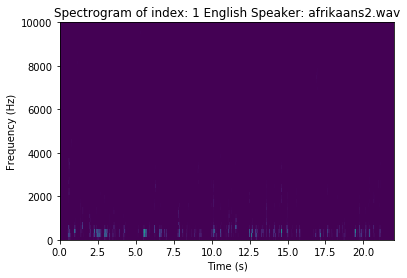

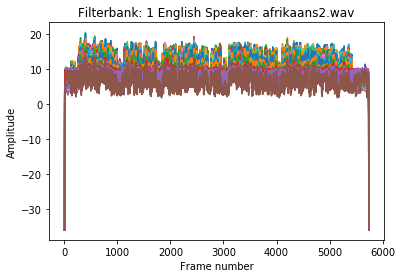

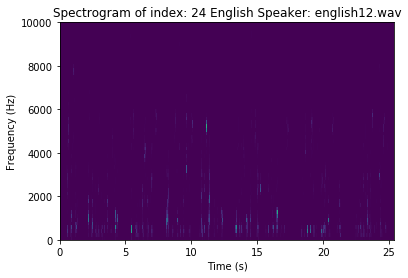

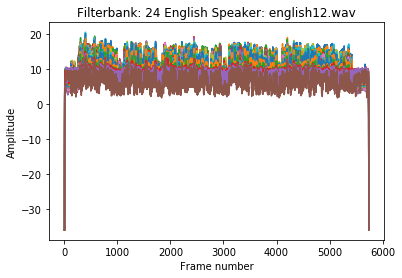

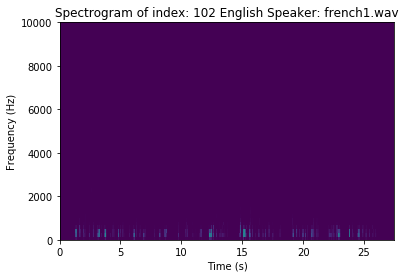

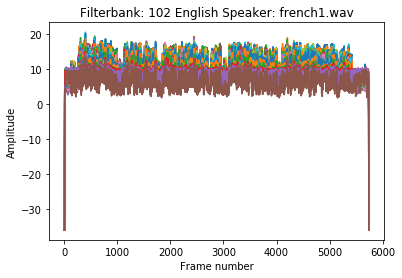

In [6]:
#Plot some spectrograms
list_indices = [1, 24, 102]
#list_indices = [24, 45, 96, 100, 102]
#list_indices = [114, 130, 145, 1, 2, 20, 21, 23]
for index in list_indices:
    plt.pcolormesh(list_of_dicts[index]['t'], list_of_dicts[index]['f'] , list_of_dicts[index]['spectrogram'])
    plt.title('Spectrogram of index: ' + str(index) + ' English Speaker: ' + str((list_of_dicts[index]['filename'])))
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.ylim(0, 10000)
    plt.show()
    
    #plt.plot(range(np.size(list_of_dicts[0]['fbank_feat'], 0)), list_of_dicts[0]['fbank_feat'])
    #plt.title('Filterbank: ' + str(index) + ' English Speaker: ' + str(list_of_dicts[index]['filename']))
    #plt.ylabel('Amplitude')
    #plt.xlabel('Frame number')
    #plt.show()

In [30]:
from keras import optimizers
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, concatenate
from sklearn.preprocessing import OneHotEncoder

#Apply a simple CNN to filterbanks
#inputfilterbank = Input(shape=(26,))

#Time domain branch
#First layer should be 5000 neurons

model = Sequential()

model.add(Dense(26, activation="relu", input_shape = (26, )))
model.add(Dense(26, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1, activation="softmax"))

#model = Model(inputs = x, output = x_out)
print('Model Constructed')

Model Constructed


In [37]:
#Separate data for use in hybrid network(s)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
test_size = 0.15

X_train, X_test, y_train, y_test = train_test_split(list_of_dicts, labels, test_size = test_size, random_state = 256)

bank_train = []
#stft_train = []

for index in range(len(X_train)):
    bank_data = X_train[index]['fbank_means']
    #stft_data = X_train[index]['stft_data']
    bank_train.append(bank_data)
    #stft_train.append(stft_data)
    
bank_test = []
#stft_test = []
    

for index in range(len(X_test)):
    bank_data = X_test[index]['fbank_means']
    #stft_data = X_test[index]['stft_data']
    bank_test.append(bank_data)
    #stft_test.append(stft_data)
    
print('Separated Training / Test')   
print('num_objs T: ' + str(len(bank_test)) + 'obj_len T: ' + str(len(bank_test[0])))
#print('num_objs F: ' + str(len(stft_test)) + 'obj_len F: ' + str(len(stft_test[0])))

Separated Training / Test
num_objs T: 26obj_len T: 26


In [32]:
#Compile model and run
Adam=optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])
training_data = bank_train
test_data = bank_test
print('Keras Model Starting...')

Keras Model Starting...


In [33]:
#Run model
history=model.fit(training_data, y_train , validation_data=(test_data, y_test), epochs=50)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 144 arrays: [array([[10.66112969],
       [10.10819866],
       [ 9.93532105],
       [10.10598194],
       [ 9.75435543],
       [ 9.51784424],
       [ 9.53725468],
       [ 9.97822433],
       [10.67533981],
 ...